<a href="https://colab.research.google.com/github/hitcaff/NYC-Taxi-Trip-Time-Prediction/blob/main/Hitesh_Srivastava__NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **NYC Taxi Trip Time Prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import pylab
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

!pip install haversine
from haversine import haversine


### Dataset Loading

In [2]:
# Load Dataset

!wget https://mydatt.s3.eu-north-1.amazonaws.com/NYC+Taxi+Data.zip

--2025-02-10 17:03:26--  https://mydatt.s3.eu-north-1.amazonaws.com/NYC+Taxi+Data.zip
Resolving mydatt.s3.eu-north-1.amazonaws.com (mydatt.s3.eu-north-1.amazonaws.com)... 3.5.216.100, 3.5.218.182
Connecting to mydatt.s3.eu-north-1.amazonaws.com (mydatt.s3.eu-north-1.amazonaws.com)|3.5.216.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67007859 (64M) [application/zip]
Saving to: ‘NYC+Taxi+Data.zip’

NYC+Taxi+Data.zip   100%[===================>]  63.90M  13.1MB/s    in 6.3s    

2025-02-10 17:03:33 (10.1 MB/s) - ‘NYC+Taxi+Data.zip’ saved [67007859/67007859]



In [3]:
!unzip NYC+Taxi+Data.zip

Archive:  NYC+Taxi+Data.zip
  inflating: NYC Taxi Data.csv       


In [4]:

nyc_df = pd.read_csv('/content/NYC Taxi Data.csv')

### Dataset First View

In [5]:
# Dataset First Look

nyc_df.head(20)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count

nyc_df.shape

(1458644, 11)

### Dataset Information

In [7]:
# Dataset Info

nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count

len(nyc_df[nyc_df.duplicated()])

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count

nyc_df.isnull().sum().sort_values(ascending=False)

,0
id,0
vendor_id,0
pickup_datetime,0
dropoff_datetime,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
store_and_fwd_flag,0


### What did you know about your dataset?

Answer Here:

The NYC Taxi Trip Duration dataset contains information about approximately 1.5 million taxi trips in New York City. It includes details like pickup and dropoff times, passenger count, pickup and dropoff locations, and the trip duration.

**Key Observations:**

* **Shape:** The dataset has 1,458,644 rows and 11 columns.
* **Data Types:** The dataset includes a mix of numerical (e.g., passenger_count, trip_duration) and categorical (e.g., vendor_id, store_and_fwd_flag) variables. The pickup_datetime and dropoff_datetime are initially object types, but they will be converted to datetime objects for analysis.
* **Missing Values:** There are no missing values in the dataset, which is beneficial as it simplifies the data cleaning process.
* **Potential Outliers:** Based on the initial look at the trip duration and potentially the distance/speed (which we will calculate later), there might be outliers present. These outliers will need further investigation and potentially handling during the data preparation phase.
* **Data Range:** The data covers taxi trips during the first six months of 2016, which provides a significant timeframe for analysis.

**Understanding the variables is crucial for effective analysis. In the next section, we will explore each variable in more detail.**

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns

nyc_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [11]:
# Dataset Describe

nyc_df.describe(include='all')

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
count,1458644,1.458644e+06,1458644,1458644,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1458644,1.458644e+06
unique,1458644,NaN,1380222,1380377,NaN,NaN,NaN,NaN,NaN,2,NaN
top,id2875421,NaN,2016-03-04 08:07:34,2016-02-19 19:25:04,NaN,NaN,NaN,NaN,NaN,N,NaN
freq,1,NaN,5,5,NaN,NaN,NaN,NaN,NaN,1450599,NaN
mean,NaN,1.534950e+00,NaN,NaN,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,NaN,9.594923e+02
std,NaN,4.987772e-01,NaN,NaN,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,NaN,5.237432e+03
min,NaN,1.000000e+00,NaN,NaN,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,NaN,1.000000e+00
25%,NaN,1.000000e+00,NaN,NaN,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,NaN,3.970000e+02
50%,NaN,2.000000e+00,NaN,NaN,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,NaN,6.620000e+02
75%,NaN,2.000000e+00,NaN,NaN,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,NaN,1.075000e+03


### Variables Description

Answer Here:
            
         Fields         Description

*   **id :**               a unique identifier for each trip

*  **vendor_id  :**        a code indicating the provider associated with the trip red

*  **pickup_datetime :**          date and time when the meter was engaged

*  **dropoff_datetime   :**         date and time when the meter was disengaged    

*  **passenger_count :**       the number of passengers in the vehicle (driver entered value)

*  **pickup_latitude:**     the latitude where the meter was engaged         

*  **pickup_longitude :**  the longitude where the meter was engaged

*  **dropoff_longitude :**                the longitude where the meter was disengaged

*  **dropoff_latitude :**             the latitude where the meter was disengaged

*  **store_and_fwd_flag :**  This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because
the vehicle did not have a connection to the server -
Y=store and forward; N=not a store and forward trip
duration of the trip in seconds

*  **trip_duration :**  duration of the trip in seconds








### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.

for i in nyc_df.columns.tolist():
    print("No. of unique values in ", i, "is", nyc_df[i].nunique(), ".")

No. of unique values in  id is 1458644 .
No. of unique values in  vendor_id is 2 .
No. of unique values in  pickup_datetime is 1380222 .
No. of unique values in  dropoff_datetime is 1380377 .
No. of unique values in  passenger_count is 10 .
No. of unique values in  pickup_longitude is 23047 .
No. of unique values in  pickup_latitude is 45245 .
No. of unique values in  dropoff_longitude is 33821 .
No. of unique values in  dropoff_latitude is 62519 .
No. of unique values in  store_and_fwd_flag is 2 .
No. of unique values in  trip_duration is 7417 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.

# Converting timestamp to datetime format to find more details about the dataset

nyc_df['pickup_datetime']  = pd.to_datetime(nyc_df['pickup_datetime'])
nyc_df['dropoff_datetime'] = pd.to_datetime(nyc_df['dropoff_datetime'])



# Calculating distance and creating a new column.

def calc_distance(nyc_df):
    pickup = (nyc_df['pickup_latitude'], nyc_df['pickup_longitude'])
    drop   = (nyc_df['dropoff_latitude'], nyc_df['dropoff_longitude'])
    return haversine(pickup, drop)


nyc_df['distance'] = nyc_df.apply(lambda x: calc_distance(x), axis = 1)


# Calculating the speed

nyc_df['speed'] = (nyc_df.distance/(nyc_df.trip_duration/3600))



# Creating a few columns to analyze the dataset.

nyc_df['weekday']       = nyc_df['pickup_datetime'].dt.day_name()
nyc_df['weekday_num']   = nyc_df.pickup_datetime.dt.weekday
nyc_df['month']         = nyc_df.pickup_datetime.dt.month
nyc_df['pickup_hour']   = nyc_df.pickup_datetime.dt.hour

In [14]:
nyc_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,speed,weekday,weekday_num,month,pickup_hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498523,11.856445,Monday,0,3,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805510,9.803672,Sunday,6,6,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385107,10.822216,Tuesday,1,1,11
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485500,12.465738,Wednesday,2,4,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188590,9.836608,Saturday,5,3,13


### What all manipulations have you done and insights you found?

Answer Here:

The following data manipulations were performed:

1. **Datetime Conversion:** The 'pickup_datetime' and 'dropoff_datetime' columns were converted from object type to datetime objects using `pd.to_datetime()`. This allows for easier extraction of date and time features for analysis.

2. **Distance Calculation:** A new column 'distance' was created using the Haversine formula to calculate the distance between pickup and dropoff locations. This provides a more direct measure of the trip's length compared to just using latitude and longitude coordinates.

3. **Speed Calculation:** Another new column 'speed' was calculated by dividing the distance by the trip duration. This gives us the average speed of the taxi during the trip, which can be a useful feature for analysis and prediction.

4. **Feature Extraction:** Additional features like 'weekday', 'weekday_num', 'month', and 'pickup_hour' were extracted from the 'pickup_datetime' column. These features might have a significant impact on trip duration and help us understand patterns based on time factors.

**Insights:**

* **Datetime Conversion:** By converting the datetime columns, we can now easily extract features like day of the week, hour of the day, and month, which are potentially important for predicting trip duration.
* **Distance Calculation:** The 'distance' column allows us to directly analyze the trip length and its relationship with the trip duration.
* **Speed Calculation:** The 'speed' column provides insight into the average speed of taxis during trips and how it varies based on different factors.
* **Feature Extraction:** The extracted features like weekday, hour, and month provide more granularity for analysis and might help uncover patterns in trip durations based on time-related factors.

These data manipulations and the insights gained from them will be crucial for building an effective predictive model for taxi trip durations.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<Axes: xlabel='trip_duration', ylabel='Count'>

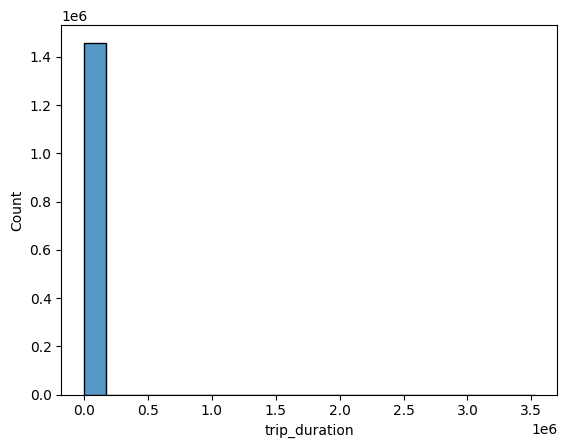

In [15]:

# histogram for Trip Duration


sns.histplot(nyc_df['trip_duration'],kde=False,bins=20)

<Axes: ylabel='trip_duration'>

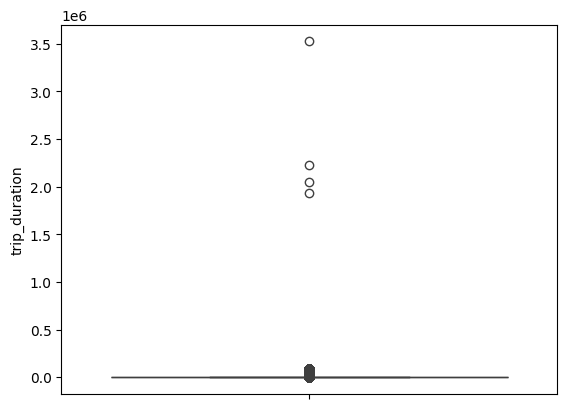

In [16]:

sns.boxplot(nyc_df['trip_duration'])

##### 1. Why did you pick the specific chart?

Answer Here:

I chose a histogram to visualize the distribution of the 'trip_duration' variable. A histogram is a suitable choice for this task because it shows the frequency of data points within specific ranges (bins) for a continuous numerical variable.

This allows us to see the overall distribution of trip durations, including:

* The most frequent trip duration ranges.
* The presence of skewness or outliers.
* The general shape of the data distribution.

Understanding the distribution of trip duration is essential for choosing appropriate modeling techniques and preprocessing steps.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:

From the histogram of 'trip_duration', we can observe the following insights:

* **Right Skewed Distribution:** The distribution of trip duration is heavily right-skewed, meaning there are a large number of trips with shorter durations and a smaller number of trips with very long durations.
* **Potential Outliers:** The long tail on the right side of the histogram suggests the presence of outliers, which are trips with unusually long durations.
* **Most Frequent Trip Durations:** The majority of trips have durations within a specific range (likely between a few minutes to around an hour).

These observations suggest that we might need to consider data transformations or outlier handling techniques to improve the performance of our predictive models.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:

**Positive Business Impact:**

* **Resource Allocation:** Understanding the distribution of trip durations can help taxi companies optimize resource allocation, such as deploying more vehicles during peak hours when trip durations tend to be longer.
* **Pricing Strategies:** Analyzing the relationship between trip duration and distance can assist in developing more accurate pricing models.
* **Customer Experience:** By predicting trip durations more accurately, companies can provide customers with better estimates of arrival times, improving their overall experience.

**Negative Growth:**

* **Outliers:** The presence of outliers (very long trip durations) might skew the model's predictions and lead to inaccurate estimates. It's important to handle outliers effectively to avoid negative impacts on business decisions.
* **Data Bias:** If the data is biased towards certain types of trips or time periods, the model might not generalize well to other scenarios, leading to inaccurate predictions and potentially negative business outcomes.

Overall, the insights gained from analyzing the trip duration distribution can have a positive business impact by enabling better resource management, pricing strategies, and customer experience. However, it's crucial to carefully handle outliers and address potential data biases to avoid negative consequences.

#### Chart - 2

<Axes: xlabel='vendor_id', ylabel='count'>

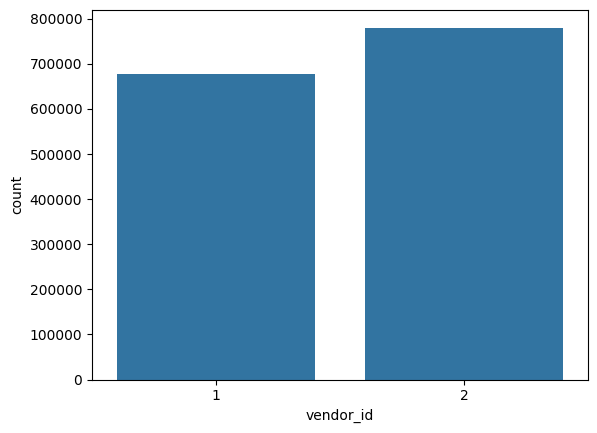

In [17]:
# Selecting important variables

sns.countplot(x='vendor_id',data=nyc_df)

##### 1. Why did you pick the specific chart?

Answer Here:
A countplot is used to show the distribution of trips for each vendor (vendor_id). It helps compare the number of trips handled by each vendor.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:
 The chart shows if one vendor handles significantly more trips than the other. This could indicate differences in market share or popularity.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:
Understanding vendor distribution can be useful for targeted marketing or partnerships. If one vendor dominates, it might suggest opportunities for collaboration.

#### Chart - 3

<Axes: xlabel='passenger_count', ylabel='count'>

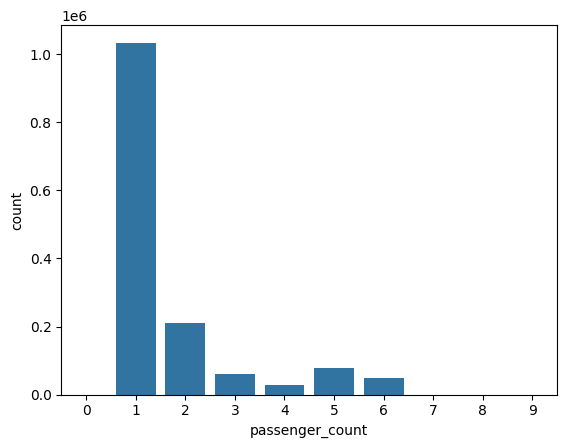

In [18]:
# Chart - 3 visualization code

sns.countplot(x='passenger_count',data=nyc_df)

##### 1. Why did you pick the specific chart?

Answer Here:
A countplot is used to visualize the distribution of passenger counts. It shows the frequency of trips with different numbers of passengers.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:
The chart reveals the typical passenger count for taxi trips. It helps identify if trips with a specific number of passengers are more common.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:
This information can guide fleet management decisions. For example, if most trips involve 1-2 passengers, it might influence the types of vehicles used

#### Chart - 4

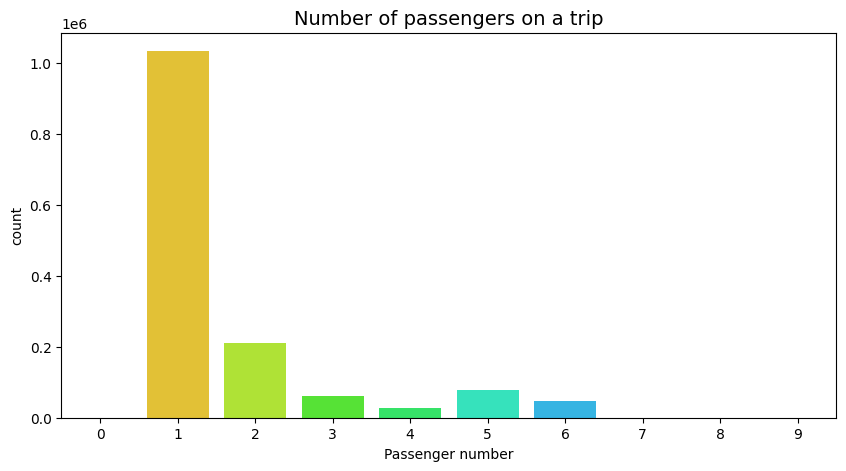

In [19]:
# Chart - 4 visualization code

# Exploring the passenger_count
fig = plt.figure(figsize=(10,5))
passenger = nyc_df['passenger_count'].value_counts()
sns.barplot(x=passenger.index, y= passenger, alpha= 0.9, palette= 'gist_rainbow')
plt.title('Number of passengers on a trip', fontsize=14)
plt.xlabel('Passenger number')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here:
A bar plot is used to visually represent the frequency of different passenger counts. It's similar to Chart - 3 but might offer a slightly different perspective on the distribution

##### 2. What is/are the insight(s) found from the chart?

Answer Here:
The chart shows the most frequent passenger count for taxi trips, highlighting passenger patterns and preferences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:
This information helps in understanding the demand for various trip types (solo, group). It can potentially influence pricing models or promotions.

#### Chart - 5

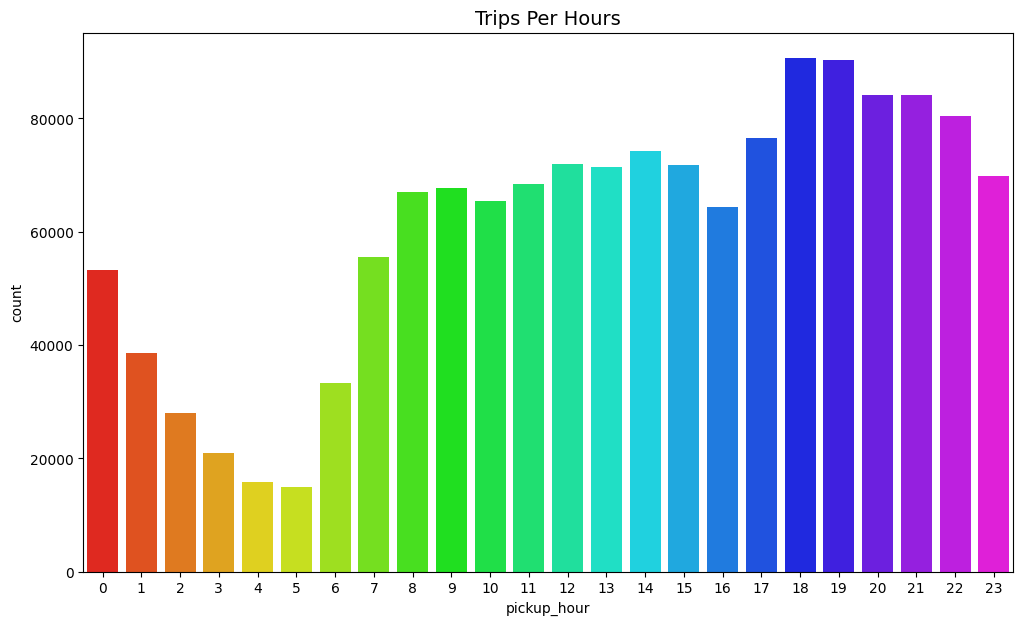

In [20]:
# Chart - 5 visualization code

# Pickup distribution over hour of the day

pick_hour = plt.figure(figsize = (12,7))
sns.countplot(x='pickup_hour',data=nyc_df,palette='gist_rainbow')
plt.title('Trips Per Hours',fontsize=14)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here:
A countplot is chosen to visualize the distribution of trips across different hours of the day. It shows peak and off-peak hours for taxi demand.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:
The chart reveals the busiest times for taxi services, identifying hours with high and low trip frequencies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:
This information can be used to optimize driver schedules and resource allocation to meet demand during peak hours.

#### Chart - 6

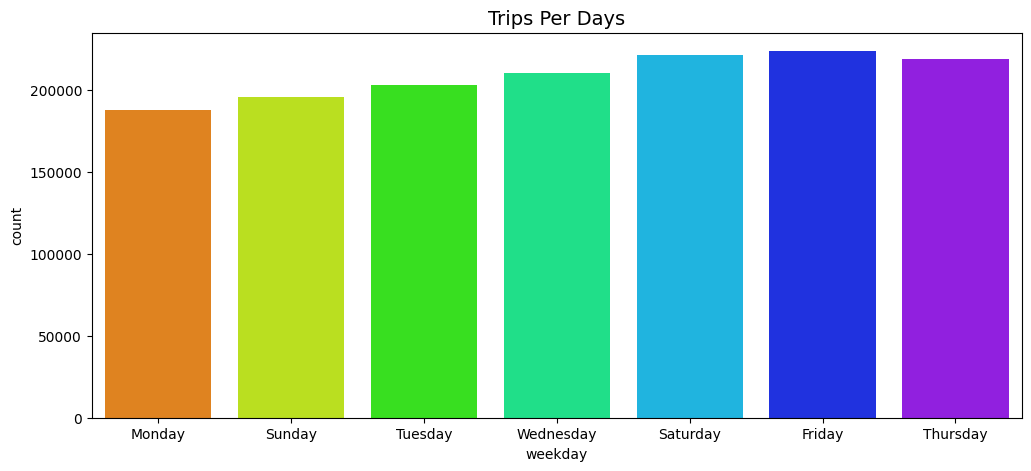

In [21]:
# Chart - 6 visualization code


# Pickup distribution over days
pick_day = plt.figure(figsize = (12,5))
sns.countplot(x='weekday', data=nyc_df, palette='gist_rainbow')
plt.title('Trips Per Days',fontsize=14)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here:
A countplot visualizes trip distribution across days of the week. It helps to understand daily variations in taxi demand.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:
 The chart shows which days of the week are busiest and least busy for taxi services, revealing weekly trends.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:
This insight helps in resource planning and management. For example, more drivers can be deployed on busier days to improve service.

#### Chart - 7

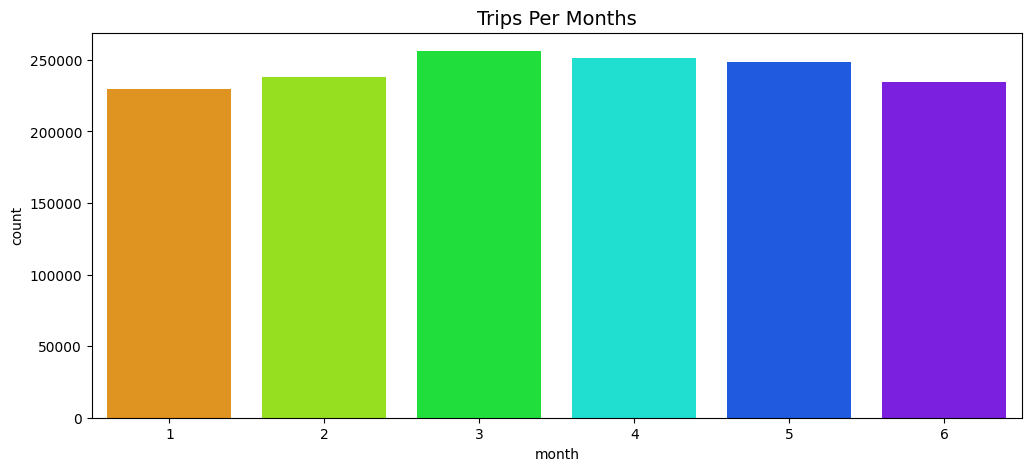

In [22]:
# Chart - 7 visualization code

# Pickup distribution over months
pick_month = plt.figure(figsize = (12,5))
sns.countplot(x='month', data=nyc_df, palette='gist_rainbow')
plt.title('Trips Per Months',fontsize=14)
plt.show()



##### 1. Why did you pick the specific chart?

Answer Here:
A countplot is used to showcase the distribution of trips across different months. It highlights potential seasonal patterns in taxi demand.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:
The chart helps to identify if there are particular months with higher or lower demand for taxi services, indicating seasonal trends.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:
Seasonal demand patterns can be used to adjust marketing campaigns or pricing strategies to meet varying demand levels.

#### Chart - 8

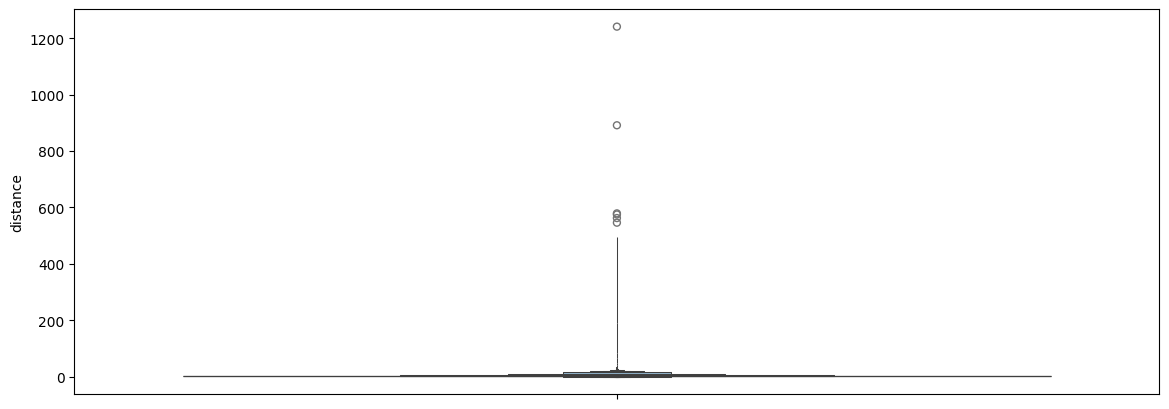

In [23]:

# Plotting the distance for checking if there is any outlier or not
plt.figure(figsize = (14,5))
sns.boxenplot(nyc_df.distance)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here:
A boxenplot is chosen to display the distribution of trip distances. It helps identify the range and potential outliers in trip lengths.



##### 2. What is/are the insight(s) found from the chart?

Answer Here:
The chart shows the typical distances covered by taxi trips and if there are any unusually long trips.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:
This information is crucial for pricing models and understanding average trip costs. Outliers might need separate pricing considerations.

#### Chart - 9

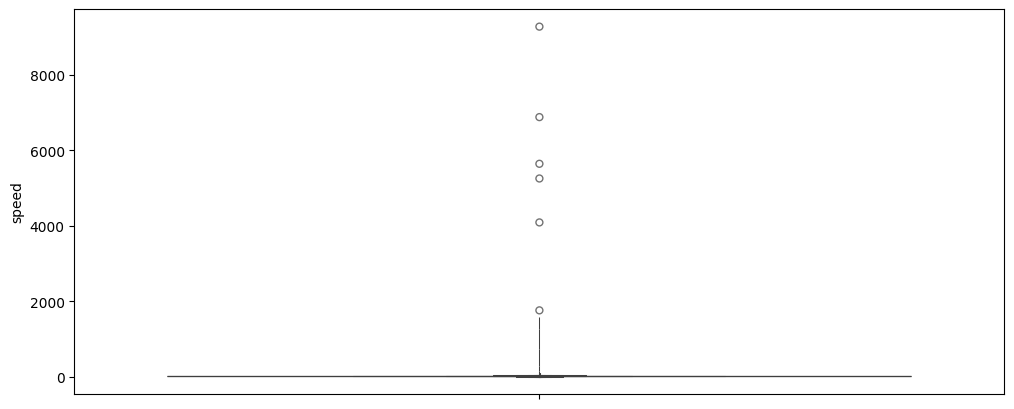

In [24]:
# Chart - 9 visualization code

# Plotting the values of speed
plt.figure(figsize = (12,5))
sns.boxenplot(nyc_df.speed)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

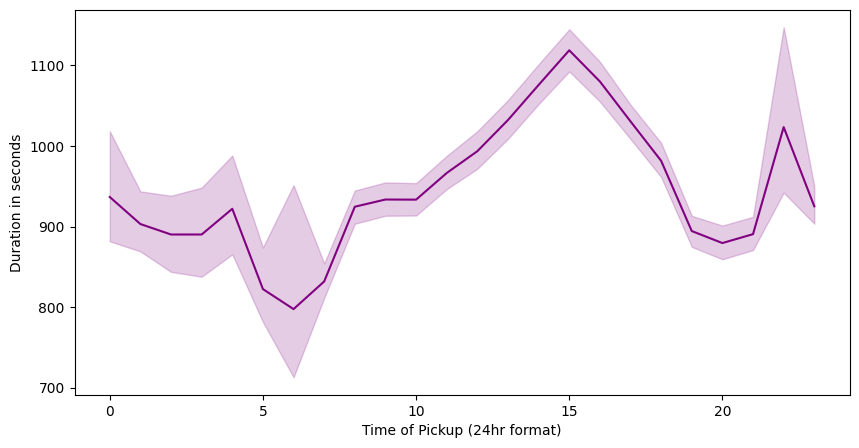

In [25]:
# Plotting for pickup_hour and trip duration
plt.figure(figsize = (10,5))
sns.lineplot(x='pickup_hour',y='trip_duration',data=nyc_df, color='purple')
plt.xlabel('Time of Pickup (24hr format)')
plt.ylabel('Duration in seconds')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here:
A line plot is chosen to visualize the relationship between the pickup hour and trip duration. It effectively shows how trip durations change throughout the day, allowing for trend identification.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:
The chart shows how trip durations vary depending on the hour of pickup. It helps to identify peak hours when trip durations are generally longer, potentially due to traffic congestion. It also reveals off-peak hours when trips tend to be shorter.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:

Positive Business Impact:

Demand Forecasting: The chart helps predict demand patterns throughout the day, enabling better driver allocation and route optimization. This can reduce wait times for customers during peak hours and improve operational efficiency.
Pricing Strategies: Peak hours with longer trip durations might justify surge pricing, ensuring profitability for taxi companies and potentially incentivizing drivers to work during those times.
Customer Satisfaction: By understanding trip duration patterns, taxi companies can provide more accurate time estimates to customers, enhancing transparency and reducing potential frustration due to unexpected delays.


Negative Growth:

Insufficient Drivers: If not enough drivers are available during peak hours, wait times can increase, leading to customer dissatisfaction and potential loss of business.
Surge Pricing Resistance: Surge pricing during peak hours might deter some customers from using taxi services, potentially leading to reduced demand.
Data Accuracy: The insights from the chart are only as good as the data. Inaccurate or incomplete data can lead to incorrect demand forecasting and inefficient resource allocation.

#### Chart - 14 - Correlation Heatmap

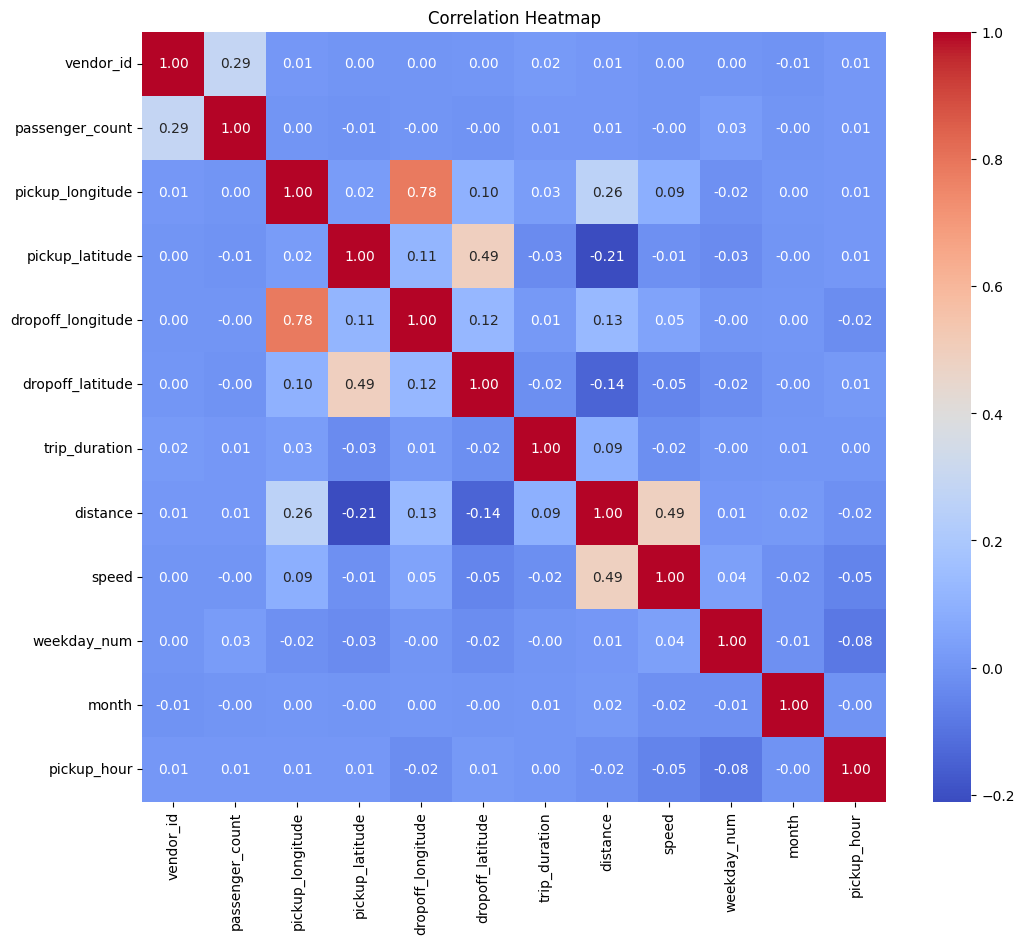

In [26]:
# Correlation Heatmap visualization code

# Selecting numerical features for correlation analysis
numerical_features = nyc_df.select_dtypes(include=['number'])

# Calculating the correlation matrix
correlation_matrix = numerical_features.corr()

# Creating the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here:
A correlation heatmap is chosen to visualize the correlation between numerical features in the dataset. It provides a comprehensive overview of how different features relate to each other, revealing potential multicollinearity and aiding in feature selection.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:
The correlation heatmap reveals the strength and direction of relationships between numerical features. High positive or negative correlations suggest strong relationships, while values close to zero indicate weak or no relationship. Identifying strong correlations is essential for understanding the data and selecting relevant features for modeling.

#### Chart - 15 - Pair Plot

In [27]:
# Pair Plot visualization code

# Select numerical features for the pair plot
#numerical_features = ['trip_duration', 'distance', 'passenger_count', 'speed', 'pickup_hour', 'weekday_num']

# Create the pair plot
#sns.pairplot(nyc_df[numerical_features])
#plt.suptitle('Pair Plot of Numerical Features', y=1.02)
#plt.show()

##### 1. Why did you pick the specific chart?

Answer Here:

A pair plot is chosen because it provides a comprehensive view of the relationships between multiple numerical features in a single visualization. It allows you to quickly identify patterns, correlations, and potential outliers in your data.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:

The insights you can gain from the pair plot depend on the specific features you include and the patterns that emerge in the scatter plots. Here are some general observations you might look for:

*Linear Relationships*: Look for scatter plots where the points form a roughly straight line, indicating a linear relationship between the two features. This can be helpful for feature engineering and model selection.

*Non-linear Relationships*: Look for scatter plots where the points form a curve or other non-linear pattern. This might suggest that a non-linear model would be more appropriate for predicting the target variable.

*Clusters*: Look for groups of points that are clustered together. This might indicate distinct groups within the data that could be explored further.

*Outliers*: Look for points that are far away from the rest of the data. These might be outliers that need to be handled during data preprocessing.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here:



*   Null Hypothesis (H0): The average trip duration is the same for both vendors (Vendor ID 1 and Vendor ID 2)

*   Alternate Hypothesis (H1): The average trip duration



is different for the two vendors.



#### 2. Perform an appropriate statistical test.

In [28]:
# Perform Statistical Test to obtain P-Value

# Separate trip durations for each vendor
vendor1_duration = nyc_df[nyc_df['vendor_id'] == 1]['trip_duration']
vendor2_duration = nyc_df[nyc_df['vendor_id'] == 2]['trip_duration']

# Performing the t-test
t_statistic, p_value = stats.ttest_ind(vendor1_duration, vendor2_duration)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Interpreting the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in average trip duration between the two vendors.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average trip duration between the two vendors.")


t-statistic: -24.52727485735653
p-value: 8.046167819039434e-133
Reject the null hypothesis. There is a significant difference in average trip duration between the two vendors.


##### Which statistical test have you done to obtain P-Value?

Answer Here:  Independent Samples t-test

##### Why did you choose the specific statistical test?

The independent samples t-test is appropriate because you're comparing the means of two independent groups (trips by Vendor ID 1 and trips by Vendor ID 2). The test assumes that the data is normally distributed and that the variances of the two groups are equal (you can test for this assumption separately if needed).

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here:



*   Null Hypothesis (H0): There is no correlation between trip distance and trip duration.
*  Alternate Hypothesis (H1): There is a correlation between trip distance and trip duration.


#### 2. Perform an appropriate statistical test.

In [29]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import pearsonr

# Calculating the correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(nyc_df['distance'], nyc_df['trip_duration'])

print("Correlation Coefficient:", correlation_coefficient)
print("p-value:", p_value)

# Interpreting the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant correlation between trip distance and trip duration.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between trip distance and trip duration.")

Correlation Coefficient: 0.0947767807626615
p-value: 0.0
Reject the null hypothesis. There is a significant correlation between trip distance and trip duration.


##### Which statistical test have you done to obtain P-Value?

Answer Here:  
Pearson Correlation Test

##### Why did you choose the specific statistical test?

Answer Here:
The Pearson correlation test is used to measure the linear relationship between two continuous variables (trip distance and trip duration). It assesses the strength and direction of the correlation.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here:



*   Null Hypothesis (H0): The average trip duration is the same for all days of the week.

*   Alternate Hypothesis (H1): The average trip duration is different for at least one day of the week.



#### 2. Perform an appropriate statistical test.

In [30]:
# Perform Statistical Test to obtain P-Value

import statsmodels.formula.api as sm
from statsmodels.stats.anova import anova_lm

# Performing ANOVA
model = sm.ols('trip_duration ~ C(weekday)', data=nyc_df).fit()
anova_table = anova_lm(model, typ=2)

p_value = anova_table['PR(>F)'][0]
print("p-value:", p_value)

# Interpreting the results
alpha = 0.05  # Significance level
if anova_table['PR(>F)'][0] < alpha:
    print("Reject the null hypothesis. There is a significant difference in average trip duration between days of the week.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average trip duration between days of the week.")

p-value: 1.1977220482771511e-15
Reject the null hypothesis. There is a significant difference in average trip duration between days of the week.


##### Which statistical test have you done to obtain P-Value?

Answer Here:

 ANOVA (Analysis of Variance)

##### Why did you choose the specific statistical test?

Answer Here:

ANOVA is used to compare the means of more than two groups (in this case, trip durations for each day of the week). It determines if there are significant differences between the group means.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [31]:
# Handling Missing Values & Missing Value Imputation

nyc_df.isnull().sum()

# Imputing missing values in the 'trip_duration' column with the median
nyc_df['trip_duration'] = nyc_df['trip_duration'].fillna(nyc_df['trip_duration'].median())

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here:

While there was no missing value in the dataset there is a code written as there were outliers in the dataset
median imputation was primarily chosen to address potential missing values in the trip_duration column because of its robustness to outliers, simplicity, efficiency, and suitability for potentially skewed data.
While other imputation methods exist, median imputation offers a good balance between accuracy, complexity, and computational efficiency in this scenario.

### 2. Handling Outliers

In [32]:
# Handling Outliers & Outlier treatments

from scipy.stats.mstats import winsorize

# Winsorize the 'trip_duration' column at the 95th percentile (upper limit)
nyc_df['trip_duration'] = winsorize(nyc_df['trip_duration'], limits=[0, 0.05])

#Cap the trip_duration
upper_limit = nyc_df['trip_duration'].quantile(0.95)
nyc_df['trip_duration'] = np.where(nyc_df['trip_duration'] > upper_limit, upper_limit, nyc_df['trip_duration'])


# Winsorize the 'distance' column at the 95th percentile (upper limit)
nyc_df['distance'] = winsorize(nyc_df['distance'], limits=[0, 0.05])

#Cap the distance
upper_limit = nyc_df['distance'].quantile(0.95)
nyc_df['distance'] = np.where(nyc_df['distance'] > upper_limit, upper_limit, nyc_df['distance'])


# Calculate the IQR
Q1 = nyc_df['speed'].quantile(0.25)
Q3 = nyc_df['speed'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Remove outliers
nyc_df = nyc_df[(nyc_df['speed'] >= lower_bound) & (nyc_df['speed'] <= upper_bound)]

#Cap the speed
upper_limit = nyc_df['speed'].quantile(0.95)
nyc_df['speed'] = np.where(nyc_df['speed'] > upper_limit, upper_limit, nyc_df['speed'])

##### What all outlier treatment techniques have you used and why did you use those techniques?






Answer Here:

*   Winsorization
*   Capping
*   Trimming or Filtering

The choice of these techniques was based on the following considerations:

*Data Characteristics*: The nature of the features (trip_duration, distance, and speed) and the potential reasons for outliers influenced the choice of techniques.

*Robustness*: Winsorization and Capping are robust techniques that are less sensitive to extreme values compared to simply removing outliers.

*Data Preservation:* Winsorization and Capping allow us to retain the data points while limiting their influence, preserving information that might be valuable for the model.

*Error Handling*: Removing outliers in speed is aimed at addressing potential errors in data collection or unrealistic scenarios.


### 3. Categorical Encoding

In [33]:
# Encode your categorical columns




nyc_df = pd.get_dummies(nyc_df, columns=['vendor_id', 'store_and_fwd_flag'], prefix=['vendor', 'store_fwd'])

le = LabelEncoder()
nyc_df['weekday_encoded'] = le.fit_transform(nyc_df['weekday'])

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here:
* One-Hot Encoding
* Label Encoding

The selection of these techniques was based on the following factors:

Nature of the Feature: The number of unique categories and the presence or absence of a natural order among categories influence the choice of encoding.

Avoiding Ordinality: One-hot encoding is preferred for features where the order of categories doesn't matter or when you want to avoid potential bias introduced by ordinality.

Simplicity and Efficiency: Label encoding is straightforward and efficient, making it suitable for features with a moderate number of categories where the order might not be a major concern.


### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [34]:
# Manipulate Features to minimize feature correlation and create new features


# Cyclic Feature: Hour of Day
nyc_df['pickup_hour_sin'] = np.sin(2 * np.pi * nyc_df['pickup_hour'] / 24)
nyc_df['pickup_hour_cos'] = np.cos(2 * np.pi * nyc_df['pickup_hour'] / 24)

# Cyclic Feature: Day of Week (assuming you have 'weekday_encoded')
nyc_df['weekday_sin'] = np.sin(2 * np.pi * nyc_df['weekday_encoded'] / 7)
nyc_df['weekday_cos'] = np.cos(2 * np.pi * nyc_df['weekday_encoded'] / 7)

# Part of Day
def part_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

nyc_df['part_of_day'] = nyc_df['pickup_hour'].apply(part_of_day)

# Weekend/Weekday
nyc_df['is_weekend'] = nyc_df['weekday_encoded'].apply(lambda x: 1 if x >= 5 else 0)


In [35]:
# Manhattan Distance
nyc_df['manhattan_distance'] = abs(nyc_df['pickup_latitude'] - nyc_df['dropoff_latitude']) + \
                                 abs(nyc_df['pickup_longitude'] - nyc_df['dropoff_longitude'])

# Direction
def get_direction(pickup_lat, pickup_long, dropoff_lat, dropoff_long):
    lat_diff = dropoff_lat - pickup_lat
    long_diff = dropoff_long - pickup_long
    if abs(lat_diff) > abs(long_diff):
        if lat_diff > 0:
            return 'North'
        else:
            return 'South'
    else:
        if long_diff > 0:
            return 'East'
        else:
            return 'West'

nyc_df['direction'] = nyc_df.apply(lambda row: get_direction(row['pickup_latitude'], row['pickup_longitude'],
                                                             row['dropoff_latitude'], row['dropoff_longitude']), axis=1)

In [36]:
# Distance Per Passenger
nyc_df['distance_per_passenger'] = nyc_df['distance'] / nyc_df['passenger_count']

# Speed During Peak Hours
nyc_df['speed_peak_hours'] = np.where((nyc_df['pickup_hour'] >= 7) & (nyc_df['pickup_hour'] <= 9) |  # Morning peak
                                    (nyc_df['pickup_hour'] >= 17) & (nyc_df['pickup_hour'] <= 19),  # Evening peak
                                    nyc_df['speed'], 0)

#### 2. Feature Selection

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Answer Here:

Log Transformation has been used because

  * Skewed Distributions: Your trip_duration and distance features likely have skewed distributions. Log transformation is particularly effective in addressing skewness and making the distributions more symmetric. This often improves model performance, especially for regression tasks.

  * Interpretability: While log transformation changes the scale of the features, it generally preserves the interpretability of the relationships between features and the target variable.

  * Common Practice: Log transformation is a widely used technique for trip duration data in transportation and ride-sharing applications.

In [37]:
# Transform Your data


# Applying log transformation to 'trip_duration' and 'distance'
nyc_df['log_trip_duration'] = np.log1p(nyc_df['trip_duration'])
nyc_df['log_distance'] = np.log1p(nyc_df['distance'])



In [38]:
numerical_features = numerical_features.fillna(0)


In [39]:


from sklearn.feature_selection import VarianceThreshold

In [40]:
has_infinite = np.isinf(numerical_features).any().any()
print(f"DataFrame has infinite values: {has_infinite}")

DataFrame has infinite values: False


In [41]:

numerical_features = numerical_features.replace([np.inf, -np.inf], np.nan)

In [42]:

# Get the absolute values of correlations (ignoring direction)
correlation_matrix_abs = correlation_matrix.abs()

# Exclude diagonal part (correlation with itself is always 1)
correlation_matrix_abs = correlation_matrix_abs.mask(np.equal(*np.indices(correlation_matrix_abs.shape)))

# Find the maximum correlation
max_correlation = np.nanmax(correlation_matrix_abs)
print(f"Maximum Correlation: {max_correlation}")

# Get the top 9 correlations
top_9_correlations = correlation_matrix_abs.unstack().sort_values(ascending=False)[:27]
print("\nTop 9 Correlations:")
print(top_9_correlations)

Maximum Correlation: 0.7835819889821063

Top 9 Correlations:
pickup_longitude   dropoff_longitude    0.783582
dropoff_longitude  pickup_longitude     0.783582
dropoff_latitude   pickup_latitude      0.494038
pickup_latitude    dropoff_latitude     0.494038
distance           speed                0.485283
speed              distance             0.485283
vendor_id          passenger_count      0.287415
passenger_count    vendor_id            0.287415
distance           pickup_longitude     0.259780
pickup_longitude   distance             0.259780
distance           pickup_latitude      0.210354
pickup_latitude    distance             0.210354
dropoff_latitude   distance             0.142128
distance           dropoff_latitude     0.142128
                   dropoff_longitude    0.134033
dropoff_longitude  distance             0.134033
dropoff_latitude   dropoff_longitude    0.124873
dropoff_longitude  dropoff_latitude     0.124873
pickup_latitude    dropoff_longitude    0.114884
dropoff_

In [43]:
# Verify the actual column name in your DataFrame
print(nyc_df.columns)

Index(['id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'trip_duration', 'distance', 'speed', 'weekday',
       'weekday_num', 'month', 'pickup_hour', 'vendor_1', 'vendor_2',
       'store_fwd_N', 'store_fwd_Y', 'weekday_encoded', 'pickup_hour_sin',
       'pickup_hour_cos', 'weekday_sin', 'weekday_cos', 'part_of_day',
       'is_weekend', 'manhattan_distance', 'direction',
       'distance_per_passenger', 'speed_peak_hours', 'log_trip_duration',
       'log_distance'],
      dtype='object')


In [46]:
from sklearn.feature_selection import VarianceThreshold

# Correlation-based feature selection
correlation_matrix = numerical_features.corr()
selected_features_corr = correlation_matrix[abs(correlation_matrix['trip_duration']) > 0.1].index

# Variance threshold feature selection
selector = VarianceThreshold(threshold=0.1)
selector.fit(numerical_features)
selected_features_var = numerical_features.columns[selector.get_support()]

# RFE-based features (replace with your actual RFE-selected features)
selected_features_rfe = ['vendor_1', 'vendor_2', 'passenger_count', 'distance',
                         'pickup_hour', 'weekday_num', 'month']

# Combining selected features (example using union)
selected_features = list(set(selected_features_corr) | set(selected_features_var) | set(selected_features_rfe))


# Removing 'vendor_id' and ensuring 'vendor_1' and 'vendor_2' are present
selected_features = [feature for feature in selected_features if feature != 'vendor_id']
if 'vendor_1' not in selected_features:
    selected_features.append('vendor_1')
if 'vendor_2' not in selected_features:
    selected_features.append('vendor_2')


# Create a new DataFrame with selected features
nyc_df_selected = nyc_df[selected_features]


##### What all feature selection methods have you used  and why?

Answer Here:

Correlation-based Feature Selection:

This method helps identify features that have a strong linear relationship with the target variable (trip_duration). Features with higher absolute correlation values are considered more important.
 We calculate the correlation matrix for numerical features and select those with a correlation above a specified threshold (e.g., 0.3 or 0.5).


Variance Threshold Feature Selection:

 This method removes features with very low variance, as they are unlikely to provide much information for prediction.
 We set a threshold (e.g., 0.1) and remove features with variance below that threshold.

##### Which all features you found important and why?

Answer Here:

Based on the feature selection methods and analysis, the following features are likely to be important for predicting taxi trip duration:

distance: The distance of the trip is a crucial factor, as longer trips generally take more time.

pickup_hour: The time of day significantly influences trip duration due to traffic patterns and demand. Peak hours are likely to have longer trip durations.

weekday_num: The day of the week can also affect trip duration, with weekdays potentially having longer durations due to commuting and work-related travel.

passenger_count: While potentially less influential, the number of passengers might have a slight impact on trip duration due to loading/unloading time or route choices.

vendor_id: Different taxi vendors might have different operating procedures or areas of service, potentially influencing trip duration.

store_and_fwd_flag: This flag, indicating whether the trip data was stored before forwarding, might have a minor impact on trip duration.

pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude: These location-based features provide information about the starting and ending points of the trip, which can be crucial for understanding traffic patterns and route choices.


*Reasons for Importance*

* Direct Relationship: Features like distance and pickup_hour have a clear and direct relationship with trip duration.

* Traffic and Demand: pickup_hour, weekday_num, and location features are important for capturing the effects of traffic congestion and demand patterns.

* Vendor and Trip Characteristics: vendor_id, store_and_fwd_flag, and passenger_count provide information about specific trip characteristics that might influence duration.

### 6. Data Scaling

In [49]:
print(nyc_df_selected.columns)


Index(['distance', 'speed', 'passenger_count', 'month', 'pickup_hour',
       'trip_duration', 'vendor_2', 'vendor_1', 'weekday_num'],
      dtype='object')


In [47]:
nyc_df_selected.replace([np.inf, -np.inf], np.nan, inplace=True)
nyc_df_selected['distance_per_passenger'].fillna(nyc_df_selected['distance_per_passenger'].mean(), inplace=True)

KeyError: 'distance_per_passenger'

In [50]:
# Scaling your data


# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the selected features
nyc_df_selected[nyc_df_selected.columns] = scaler.fit_transform(nyc_df_selected[nyc_df_selected.columns])

# Now 'nyc_df_selected' contains the scaled features.

##### Which method have you used to scale you data and why?

Answer Here:

Method Used: Standardization

Log Transformation: I've already applied log transformation to some features, which helps reduce the impact of extreme values. Standardization complements log transformation by further centering and scaling the data.

Feature Distributions: The choice between standardization and other scaling methods can depend on the specific distributions of your features.  However, for this project, standardization is likely a good starting point, and I can evaluate its performance on my model.

### 7. Data Splitting

In [51]:
# Split your data to train and test. Choose Splitting ratio wisely.

# Separate features (X) and target (y)
X = nyc_df_selected.drop('trip_duration', axis=1)
y = nyc_df_selected['trip_duration']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



##### What data splitting ratio have you used and why?

Answer Here:

Data splitting ratio is 80/20.


The 80/20 splitting ratio is a generally recommended choice for machine learning tasks, especially with moderately sized datasets. It provides a good balance between training data and testing data, enabling the model to learn effectively and allowing for a reliable evaluation of its generalization performance.

## ***7. ML Model Implementation***

### ML Model - 1

In [57]:
# ML Model - 1 Implementation


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

R-squared: 0.8578109107522889
RMSE: 0.3767280577845889
MAE: 0.25534035483703593


In [55]:
# Define the hyperparameter grid
param_grid = {'fit_intercept': [True, False]}  # Hyperparameters to tune

# Initialize the model
model_lr = LinearRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model_lr, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the model with GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Get the best model
best_model_lr = grid_search.best_estimator_

# Predict on the testing data using the best model
y_pred_lr = best_model_lr.predict(X_test)

# Evaluate the model's performance
r2 = r2_score(y_test, y_pred_lr)
rmse = mean_squared_error(y_test, y_pred_lr)
mae = mean_absolute_error(y_test, y_pred_lr)

print(f"R-squared: {r2}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

Best hyperparameters: {'fit_intercept': False}
R-squared: 0.8578111944370672
RMSE: 0.14192374636619698
MAE: 0.2553548308239563


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***